In [9]:
from matplotlib.pyplot import *
from scipy import *
from numpy import *

# a simple Runge-Kutta integrator for multiple dependent variables and one independent variable
xrange = linspace(0,10000,10001)

def rungekutta4(yprime, time, y0):
    # yprime is a list of functions, y0 is a list of initial values of y
    # time is a list of t-values at which solutions are computed
    #
    # Dependency: numpy

    N = len(time)

    y = array([thing*ones(N) for thing in y0]).T

    for ii in (xrange[N-1]):
        dt = time[ii+1] - time[ii]
        k1 = dt*yprime(y[ii], time[ii])
        k2 = dt*yprime(y[ii] + 0.5*k1, time[ii] + 0.5*dt)
        k3 = dt*yprime(y[ii] + 0.5*k2, time[ii] + 0.5*dt)
        k4 = dt*yprime(y[ii] + k3, time[ii+1])
        y[ii+1] = y[ii] + (k1 + 2.0*(k2 + k3) + k4)/6.0

    return y

# Miscellaneous functions
n= 1.0/3.0
kappa1 = 0.1
kappa2 = 0.1
kappa3 = 0.1
def total_energy(valpair):
    (x, y, px, py) = tuple(valpair)
    return .5*(px**2 + py**2) + (1.0/(1.0*(n+1)))*(kappa1*np.absolute(x)**(n+1)+kappa2*np.absolute(y-x)**(n+1)+kappa3*np.absolute(y)**(n+1))

def pqdot(valpair, tval):
    # input: [x, y, px, py], t
    # takes a pair of x and y values and returns \dot{p} according to the Hamiltonian
    (x, y, px, py) = tuple(valpair)
    return np.array([px, py, -kappa1*np.sign(x)*np.absolute(x)**n+kappa2*np.sign(y-x)*np.absolute(y-x)**n, kappa2*np.sign(y-x)*np.absolute(y-x)**n-kappa3*np.sign(y)*np.absolute(y)**n]).T

def findcrossings(data, data1):
    # returns indices in 1D data set where the data crossed zero. Useful for generating Poincare map at 0
    prb = list()
    for ii in xrange(len(data)-1):
        if (((data[ii] > 0) and (data[ii+1] < 0)) or ((data[ii] < 0) and (data[ii+1] > 0))) and data1[ii] > 0:
            prb.append(ii)
    return array(prb)

t = linspace(0, 1000.0, 100000)
print ("step size is " + str(t[1]-t[0]))

# Representative initial conditions for E=1
E = 1
x0=0
y0=0
init_cons = [[x0, y0, np.sqrt(2*E-(1.0*i/10.0)*(1.0*i/10.0)-2.0/(n+1)*(kappa1*np.absolute(x0)**(n+1)+kappa2*np.absolute(y0-x0)**(n+1)+kappa3*np.absolute(y0)**(n+1))), 1.0*i/10.0] 
             for i in range(-10,11)]

outs = list()
for con in init_cons:
    outs.append( rungekutta4(pqdot, t, con) )


# plot the results
fig1 = figure(1)
for ii in xrange(4):
    subplot(2, 2, ii+1)
    plot(outs[ii][:,1],outs[ii][:,3])
    ylabel("py")
    xlabel("y")
    title("Full trajectory projected onto the plane")

fig1.suptitle('Full trajectories E = 1', fontsize=10)


# Plot Poincare sections at x=0 and px>0
fig2 = figura(2)
for ii in xrange(4):
    subplot(2, 2, ii+1)
    xcrossings = findcrossings(outs[ii][:,0], outs[ii][:,3])
    yints = [.5*(outs[ii][cross, 1] + outs[ii][cross+1, 1]) for cross in xcrossings]
    pyints = [.5*(outs[ii][cross, 3] + outs[ii][cross+1, 3]) for cross in xcrossings]
    plot(yints, pyints,'.')
    ylabel("py")
    xlabel("y")
    title("Poincare section x = 0")

fig2.suptitle('Poincare Sections E = 1', fontsize=10)

show()

step size is 0.01000010000100001


IndexError: index 99999 is out of bounds for axis 0 with size 10001

In [19]:
range(int(xrange[N-1]))

range(0, 4)

In [18]:
xrange

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


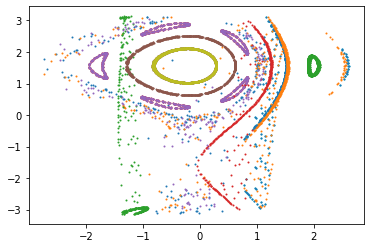

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi = np.pi

def ABC_ode(u,t):
    A, B, C = 0.75, 1, 1 # matlab parameters
    x, y, z = u
    return np.array([
        A*np.sin(z)+C*np.cos(y), 
        B*np.sin(x)+A*np.cos(z), 
        C*np.sin(y)+B*np.cos(x)
    ])

def mysolver(u0, tspan): return odeint(ABC_ode, u0, tspan, atol=1e-10, rtol=1e-11)

def find_crosssections(x0,y0):
    u0 = [x0,y0,0]
    px = []
    py = []
        
    u = mysolver(u0, np.arange(0, 4000, 0.5)); u0 = u[-1]
    u = np.mod(u+pi,2*pi)-pi
    x,y,z = u.T

    for k in range(len(z)-1): 
        if z[k]<=0 and z[k+1]>=0 and z[k+1]-z[k]<pi:
            # find a more exact intersection location by linear interpolation
            s = -z[k]/(z[k+1]-z[k])  # 0 = z[k] + s*(z[k+1]-z[k])
            rx, ry = (1-s)*x[k]+s*x[k+1], (1-s)*y[k]+s*y[k+1]
            px.append(rx); 
            py.append(ry);
    return px,py

N=15
grid = np.zeros([N,N], dtype=int)
for i in range(N):
    print(i)
    for j in range(N):
        
        if grid[i,j]>0: continue;
        x0, y0 = (2*i+1)*pi/N-pi, (2*j+1)*pi/N-pi 
        px, py = find_crosssections(x0,y0)
        for rx,ry in zip(px,py):
            m, n = int((rx+pi)*N/(2*pi)), int((ry+pi)*N/(2*pi))
            grid[m,n]=1
        

    plt.plot(px, py, '.', ms=2)




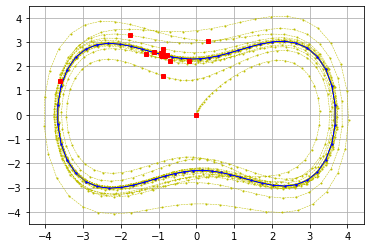

In [4]:
def RK2(f,u,times,subdiv = 1):
    uout = np.zeros((len(times),)+u.shape)
    uout[0] = u;
    for k in range(len(times)-1):
        t = times[k]
        h = (times[k+1]-times[k])/subdiv
        for j in range(subdiv):
            k1 = f(u,t)*h
            k2 = f(u+0.5*k1, t+0.5*h)*h
            u, t = u+k2, t+h
        uout[k+1]=u
    return uout

def plotphase(A,B,C,D):
    def derivs(u,t): y,z = u; return np.array([ z, -A*y**3 + B*y - C*z + D*np.sin(t) ])
    N=60
    u0 = np.array([0.0, 0.0])
    t  = np.arange(0,300,2*np.pi/N); 
    u  = RK2(derivs, u0, t, subdiv = 10)
    plt.plot(u[:-2*N,0],u[:-2*N,1],'.--y', u[-2*N:,0],u[-2*N:,1], '.-b', lw=0.5, ms=2);
    plt.plot(u[::N,0],u[::N,1],'rs', ms=4); plt.grid(); plt.show()

plotphase(0.25, 1.0, 0.1, 1.0)